In [1]:
using Revise
using Underscore
using Particles, Distributions, ConjugatePriors, DataFrames, DataFramesMeta, JLD2
using Gadfly
using StatsBase

In [2]:
Revise.track("VOTs.jl")
# --> created a module for this...
# Revise.track("Experiments.jl")

In [3]:
using Experiments, VOTs

# Run 1

This has $\alpha = \{0.01, 0.1, 1, 10\}$, $N_\mathrm{particles} = \{10, 100, 1000\}$, and $N_\mathrm{observations} = \{10, 100, 1000\}$, each run on 200 random datasets.

In [4]:
@load "results/run1-2018-01-27T23:24:32.675.jld2" exs results

2-element Array{Symbol,1}:
 :exs    
 :results

In [5]:
ers = flatten(exs, results, :num_obs)

3600-element Array{Any,1}:
 (Experiments.Experiment(Dict{Symbol,Any}(Pair{Symbol,Any}(:α, 0.01),Pair{Symbol,Any}(:num_particle, 10),Pair{Symbol,Any}(:ν_0, 2.0),Pair{Symbol,Any}(:κ_0, 0.05),Pair{Symbol,Any}(:μ_0, 31.4579),Pair{Symbol,Any}(:σ2_0, 694.493),Pair{Symbol,Any}(:num_obs, 10),Pair{Symbol,Any}(:data, [8.7906, 38.2032, 34.4798, 7.55092, 33.7626, 10.5768, 66.9819, 16.3505, 13.8196, 35.2445  …  87.9546, 70.0699, 113.279, 2.77704, 9.23872, 80.3282, -2.28151, 88.8638, 1.81956, 15.1191])), 0x38c8322558b69af0), Experiments.Result(1, 1.0, 1, [1.0]))                                                                                                                                                                                             
 (Experiments.Experiment(Dict{Symbol,Any}(Pair{Symbol,Any}(:α, 0.01),Pair{Symbol,Any}(:num_particle, 10),Pair{Symbol,Any}(:ν_0, 2.0),Pair{Symbol,Any}(:κ_0, 0.05),Pair{Symbol,Any}(:μ_0, 31.4579),Pair{Symbol,Any}(:σ2_0, 694.493),Pair{Symbol,Any}(:num_obs, 10

In [6]:
run1_summary = results_summary(ers)

36×9 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ num_particle │ num_obs │ α    │ low  │ success │ high │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼──────┼─────────┼──────┼───────────┤
│ 1   │ 10           │ 10      │ 0.01 │ 1.0  │ 0.0     │ 0.0  │ 1.0       │
│ 2   │ 10           │ 100     │ 0.01 │ 0.91 │ 0.09    │ 0.0  │ 1.09      │
│ 3   │ 10           │ 1000    │ 0.01 │ 0.83 │ 0.17    │ 0.0  │ 1.17      │
│ 4   │ 10           │ 10      │ 0.1  │ 1.0  │ 0.0     │ 0.0  │ 1.0       │
│ 5   │ 10           │ 100     │ 0.1  │ 0.67 │ 0.32    │ 0.01 │ 1.34      │
│ 6   │ 10           │ 1000    │ 0.1  │ 0.21 │ 0.63    │ 0.16 │ 1.96      │
│ 7   │ 10           │ 10      │ 1.0  │ 0.85 │ 0.13    │ 0.02 │ 1.17      │
│ 8   │ 10           │ 100     │ 1.0  │ 0.07 │ 0.34    │ 0.59 │ 2.74      │
│ 9   │ 10           │ 1000    │ 1.0  │ 0.0  │ 0.08    │ 0.92 │ 3.93      │
│ 10  │ 10           │ 10      │ 10.0 │ 0.01 │ 0.09    │ 0.9  │ 4.58      │
│ 11  │ 10           │ 100     │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 9.51      │
⋮
│ 25  │ 1000         │ 10      │ 0.01 │ 1.0  │ 0.0     │ 0.0  │ 1.0       │
│ 26  │ 1000         │ 100     │ 0.01 │ 0.47 │ 0.51    │ 0.02 │ 1.55      │
│ 27  │ 1000         │ 1000    │ 0.01 │ 0.0  │ 0.94    │ 0.06 │ 2.06      │
│ 28  │ 1000         │ 10      │ 0.1  │ 1.0  │ 0.0     │ 0.0  │ 1.0       │
│ 29  │ 1000         │ 100     │ 0.1  │ 0.19 │ 0.79    │ 0.02 │ 1.83      │
│ 30  │ 1000         │ 1000    │ 0.1  │ 0.0  │ 0.92    │ 0.08 │ 2.08      │
│ 31  │ 1000         │ 10      │ 1.0  │ 0.88 │ 0.12    │ 0.0  │ 1.12      │
│ 32  │ 1000         │ 100     │ 1.0  │ 0.07 │ 0.83    │ 0.1  │ 2.03      │
│ 33  │ 1000         │ 1000    │ 1.0  │ 0.0  │ 0.59    │ 0.41 │ 2.5       │
│ 34  │ 1000         │ 10      │ 10.0 │ 0.14 │ 0.25    │ 0.61 │ 3.23      │
│ 35  │ 1000         │ 100     │ 10.0 │ 0.0  │ 0.02    │ 0.98 │ 5.2       │
│ 36  │ 1000         │ 1000    │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 11.32     │

## Success by α and number of observations

"Success" is defined by the MAP particle having exactly 2 components.  Success is best for low alpha and more particles.  Interestingly, with very low alpha (0.01), you get to the same rate of success after 1,000 observations as with low (0.1)



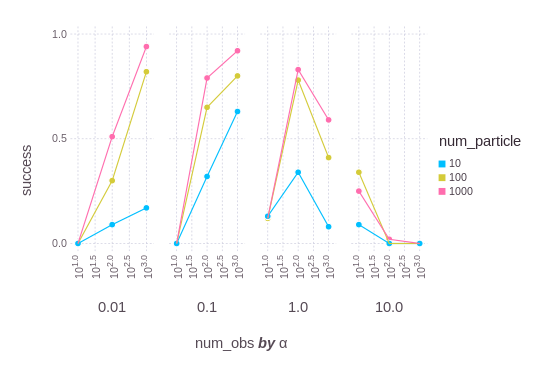

In [7]:
plot(run1_summary, x=:num_obs, y=:success, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_discrete)

For alpha = 1.0, success rises but then falls as the model imputes more clusters:

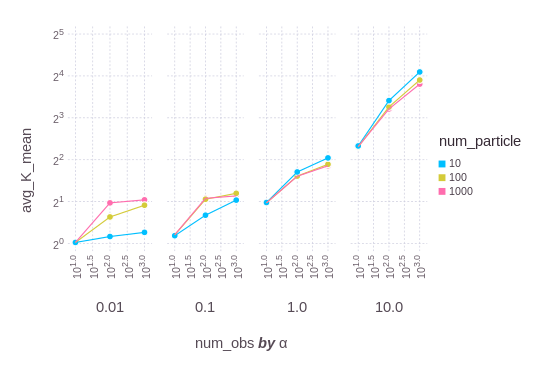

In [8]:
plot(run1_summary, x=:num_obs, y=:avg_K_mean, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.y_log2, Scale.color_discrete)

## Probability assigned to $K=2$

Another measure of success is how much posterior probability the model assigns to solutions with exactly two clusters.

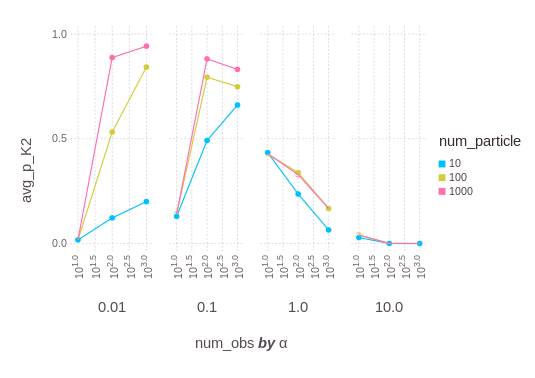

In [9]:
plot(run1_summary, x=:num_obs, y=:avg_p_K2, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_discrete)

# Run 2

This has more values of $N_\mathrm{observations}$ (up to 10,000) and $N_\mathrm{particles}$ (down to 1).

In [10]:
@load "results/run2-2018-01-30T10:05:12.518.jld2" exs results

2-element Array{Symbol,1}:
 :exs    
 :results

In [11]:
run2_ers = flatten(exs, results, :num_obs)
run2_summary = results_summary(run2_ers)

64×9 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ num_particle │ num_obs │ α    │ low   │ success │ high  │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼───────┼─────────┼───────┼───────────┤
│ 1   │ 1            │ 10      │ 0.01 │ 0.985 │ 0.015   │ 0.0   │ 1.015     │
│ 2   │ 1            │ 100     │ 0.01 │ 0.97  │ 0.03    │ 0.0   │ 1.03      │
│ 3   │ 1            │ 1000    │ 0.01 │ 0.96  │ 0.04    │ 0.0   │ 1.04      │
│ 4   │ 1            │ 10000   │ 0.01 │ 0.96  │ 0.04    │ 0.0   │ 1.04      │
│ 5   │ 1            │ 10      │ 0.1  │ 0.815 │ 0.175   │ 0.01  │ 1.195     │
│ 6   │ 1            │ 100     │ 0.1  │ 0.745 │ 0.22    │ 0.035 │ 1.29      │
│ 7   │ 1            │ 1000    │ 0.1  │ 0.675 │ 0.285   │ 0.04  │ 1.365     │
│ 8   │ 1            │ 10000   │ 0.1  │ 0.675 │ 0.285   │ 0.04  │ 1.365     │
│ 9   │ 1            │ 10      │ 1.0  │ 0.255 │ 0.46    │ 0.285 │ 2.09      │
│ 10  │ 1            │ 100     │ 1.0  │ 0.08  │ 0.26    │ 0.66  │ 3.07      │
│ 11  │ 1            │ 1000    │ 1.0  │ 0.035 │ 0.145   │ 0.82  │ 3.895     │
⋮
│ 53  │ 1000         │ 10      │ 0.1  │ 0.98  │ 0.02    │ 0.0   │ 1.02      │
│ 54  │ 1000         │ 100     │ 0.1  │ 0.17  │ 0.805   │ 0.025 │ 1.855     │
│ 55  │ 1000         │ 1000    │ 0.1  │ 0.0   │ 0.91    │ 0.09  │ 2.09      │
│ 56  │ 1000         │ 10000   │ 0.1  │ 0.0   │ 0.85    │ 0.15  │ 2.17      │
│ 57  │ 1000         │ 10      │ 1.0  │ 0.86  │ 0.14    │ 0.0   │ 1.14      │
│ 58  │ 1000         │ 100     │ 1.0  │ 0.055 │ 0.85    │ 0.095 │ 2.045     │
│ 59  │ 1000         │ 1000    │ 1.0  │ 0.0   │ 0.65    │ 0.35  │ 2.42      │
│ 60  │ 1000         │ 10000   │ 1.0  │ 0.0   │ 0.29    │ 0.71  │ 3.265     │
│ 61  │ 1000         │ 10      │ 10.0 │ 0.145 │ 0.175   │ 0.68  │ 3.295     │
│ 62  │ 1000         │ 100     │ 10.0 │ 0.0   │ 0.06    │ 0.94  │ 5.13      │
│ 63  │ 1000         │ 1000    │ 10.0 │ 0.0   │ 0.0     │ 1.0   │ 10.94     │
│ 64  │ 1000         │ 10000   │ 10.0 │ 0.0   │ 0.0     │ 1.0   │ 18.215    │

In [12]:
@where(run2_summary, isnan.(:avg_K_mean))

8×9 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ num_particle │ num_obs │ α    │ low   │ success │ high │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼───────┼─────────┼──────┼───────────┤
│ 1   │ 1            │ 1000    │ 0.01 │ 0.96  │ 0.04    │ 0.0  │ 1.04      │
│ 2   │ 1            │ 10000   │ 0.01 │ 0.96  │ 0.04    │ 0.0  │ 1.04      │
│ 3   │ 1            │ 1000    │ 0.1  │ 0.675 │ 0.285   │ 0.04 │ 1.365     │
│ 4   │ 1            │ 10000   │ 0.1  │ 0.675 │ 0.285   │ 0.04 │ 1.365     │
│ 5   │ 1            │ 1000    │ 1.0  │ 0.035 │ 0.145   │ 0.82 │ 3.895     │
│ 6   │ 1            │ 10000   │ 1.0  │ 0.035 │ 0.145   │ 0.82 │ 3.895     │
│ 7   │ 1            │ 1000    │ 10.0 │ 0.0   │ 0.0     │ 1.0  │ 18.695    │
│ 8   │ 1            │ 10000   │ 10.0 │ 0.0   │ 0.0     │ 1.0  │ 18.695    │

I'm not sure where these NaNs are coming from but I think it's all from the 1-particle runs?

## Success by α and number of observations

"Success" is defined by the MAP particle having exactly 2 components.  Success is best for low alpha and more particles.  Interestingly, with very low alpha (0.01), you get to the same rate of success after 1,000 observations as with low (0.1)



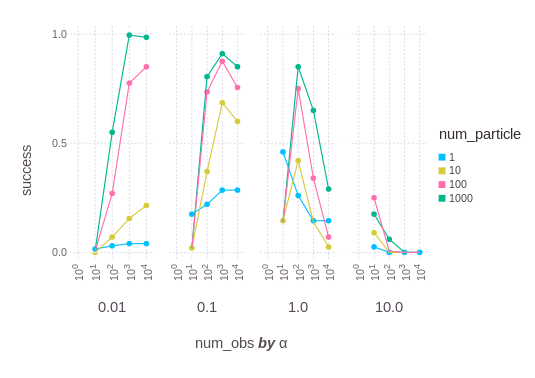

In [13]:
plot(run2_summary, x=:num_obs, y=:success, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_discrete)

For alpha = 1.0, success rises but then falls as the model imputes more clusters:

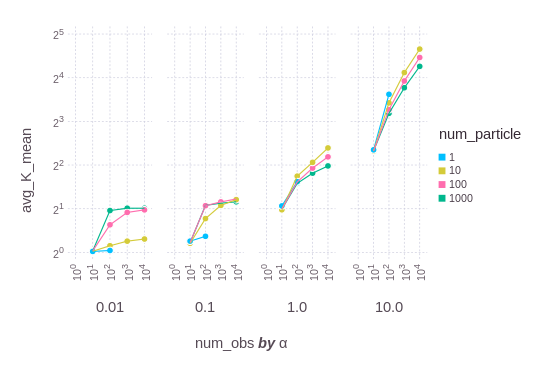

In [14]:
plot(run2_summary, x=:num_obs, y=:avg_K_mean, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.y_log2, Scale.color_discrete)

## Probability assigned to $K=2$

Another measure of success is how much posterior probability the model assigns to solutions with exactly two clusters.

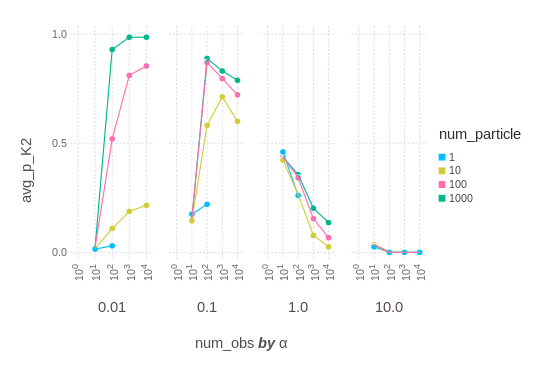

In [15]:
plot(run2_summary, x=:num_obs, y=:avg_p_K2, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_discrete)

# Distribution over number of clusters

Let's actually look at the $p(K | x_{1:n})$ distributions

In [16]:
run2_p_of_K = @_ run2_ers |>
    [Dict(er...) for er in _] |>
    dictofarrays |>
    DataFrame |>
    by(_, [:num_particle, :num_obs, :α]) do d
        pks = d[:p_of_K]
        max_k = maximum(length.(pks))
        ps = zeros(Float64, max_k)
        for pk in pks
            ps[1:length(pk)] .+= pk
        end
        DataFrame(K=1:max_k, p_of_K = ps ./ size(d,1))
    end

636×5 DataFrames.DataFrame
│ Row │ num_particle │ num_obs │ α    │ K  │ p_of_K      │
├─────┼──────────────┼─────────┼──────┼────┼─────────────┤
│ 1   │ 1            │ 10      │ 0.01 │ 1  │ 0.985       │
│ 2   │ 1            │ 10      │ 0.01 │ 2  │ 0.015       │
│ 3   │ 1            │ 100     │ 0.01 │ 1  │ 0.97        │
│ 4   │ 1            │ 100     │ 0.01 │ 2  │ 0.03        │
│ 5   │ 1            │ 1000    │ 0.01 │ 1  │ NaN         │
│ 6   │ 1            │ 1000    │ 0.01 │ 2  │ NaN         │
│ 7   │ 1            │ 10000   │ 0.01 │ 1  │ NaN         │
│ 8   │ 1            │ 10000   │ 0.01 │ 2  │ NaN         │
│ 9   │ 1            │ 10      │ 0.1  │ 1  │ 0.815       │
│ 10  │ 1            │ 10      │ 0.1  │ 2  │ 0.175       │
│ 11  │ 1            │ 10      │ 0.1  │ 3  │ 0.01        │
⋮
│ 625 │ 1000         │ 10000   │ 10.0 │ 25 │ 0.0294016   │
│ 626 │ 1000         │ 10000   │ 10.0 │ 26 │ 0.0207369   │
│ 627 │ 1000         │ 10000   │ 10.0 │ 27 │ 0.0134927   │
│ 628 │ 1000         │ 10000   │ 10.0 │ 28 │ 0.0076852   │
│ 629 │ 1000         │ 10000   │ 10.0 │ 29 │ 0.00415562  │
│ 630 │ 1000         │ 10000   │ 10.0 │ 30 │ 0.00249176  │
│ 631 │ 1000         │ 10000   │ 10.0 │ 31 │ 0.00135746  │
│ 632 │ 1000         │ 10000   │ 10.0 │ 32 │ 0.000532721 │
│ 633 │ 1000         │ 10000   │ 10.0 │ 33 │ 0.000346788 │
│ 634 │ 1000         │ 10000   │ 10.0 │ 34 │ 0.000165144 │
│ 635 │ 1000         │ 10000   │ 10.0 │ 35 │ 1.98539e-5  │
│ 636 │ 1000         │ 10000   │ 10.0 │ 36 │ 9.88485e-6  │

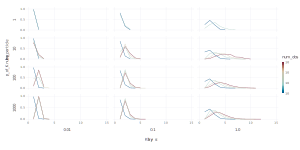

In [17]:
p_of_k_plot = @_ run2_p_of_K |> 
    @where(_, :α .< 10) |> 
    plot(_, x=:K, y=:p_of_K, ygroup=:num_particle, xgroup=:α, color=:num_obs,
         Geom.subplot_grid(Geom.line), Scale.color_log10);

draw(SVG(30cm, 15cm), p_of_k_plot)

# Gibbs sampler baseline

This is run with the same data/parameters as Run 1, using a Gibbs sampler.

In [72]:
@load "results/run1_gibbs_2018-01-30T12:18:31.076.jld2" gibbs_exs gibbs_res

2-element Array{Symbol,1}:
 :gibbs_exs
 :gibbs_res

In [73]:
gibbs_summary = results_summary(zip(gibbs_exs, gibbs_res))

36×9 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ num_particle │ num_obs │ α    │ low │ success │ high │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼─────┼─────────┼──────┼───────────┤
│ 1   │ 10           │ 10      │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 2   │ 10           │ 100     │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 3   │ 10           │ 1000    │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 4   │ 10           │ 10      │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 5   │ 10           │ 100     │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 6   │ 10           │ 1000    │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 7   │ 10           │ 10      │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 8   │ 10           │ 100     │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 9   │ 10           │ 1000    │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 10  │ 10           │ 10      │ 10.0 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 11  │ 10           │ 100     │ 10.0 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
⋮
│ 25  │ 1000         │ 10      │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 26  │ 1000         │ 100     │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 27  │ 1000         │ 1000    │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 28  │ 1000         │ 10      │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 29  │ 1000         │ 100     │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 30  │ 1000         │ 1000    │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 31  │ 1000         │ 10      │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 32  │ 1000         │ 100     │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 33  │ 1000         │ 1000    │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 34  │ 1000         │ 10      │ 10.0 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 35  │ 1000         │ 100     │ 10.0 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 36  │ 1000         │ 1000    │ 10.0 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │

There's something up with how the MAP estimate is calculated here...they all come up as 1.  I think the most reasonable measure is $p(K=2 | x)$, anyway: it's a good Bayesian estimate.

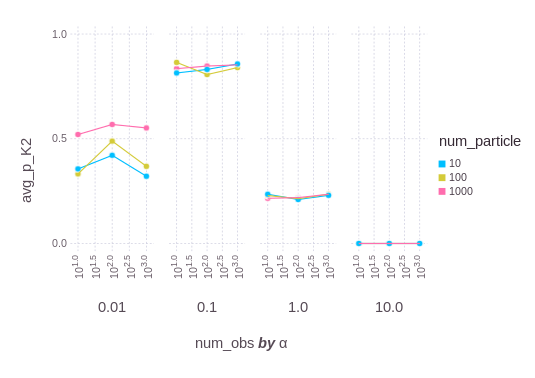

In [74]:
plot(gibbs_summary, x=:num_obs, y=:avg_p_K2, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_discrete)

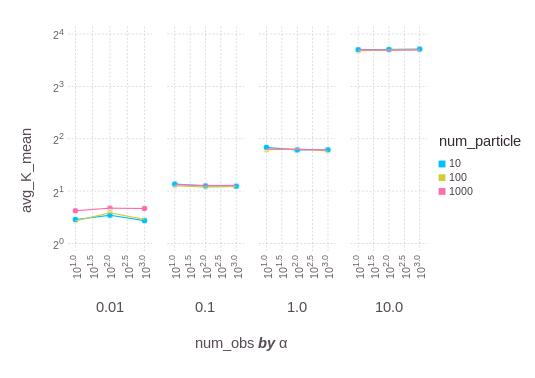

In [75]:
plot(gibbs_summary, x=:num_obs, y=:avg_K_mean, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.y_log2, Scale.color_discrete)

In [76]:
vots = reduce(vcat, unique(e.params[:data] for e in gibbs_exs))

100000-element Array{Float64,1}:
  8.7906 
 38.2032 
 34.4798 
  7.55092
 33.7626 
 10.5768 
 66.9819 
 16.3505 
 13.8196 
 35.2445 
 11.2047 
 10.2516 
 13.4033 
  ⋮      
  4.47715
 73.2088 
 38.1639 
 40.0403 
 96.8252 
 29.5474 
  1.00585
 52.9871 
 13.298  
  6.64668
  5.50253
  6.39696

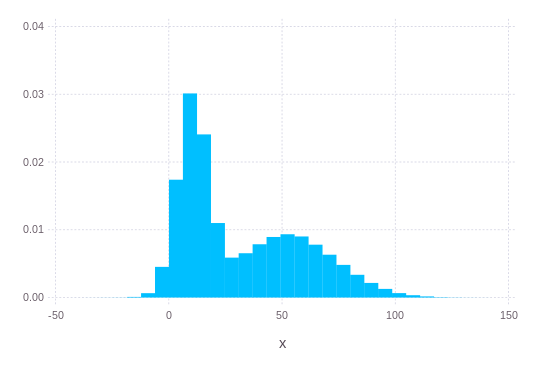

In [77]:
plot(x=vots ,Geom.histogram(bincount=30, density=true))

In [78]:
gibbs_p_of_K = @_ zip(gibbs_exs, gibbs_res) |>
    [Dict(er...) for er in _] |>
    dictofarrays |>
    DataFrame |>
    by(_, [:num_particle, :num_obs, :α]) do d
        pks = d[:p_of_K]
        max_k = maximum(length.(pks))
        ps = zeros(Float64, max_k)
        for pk in pks
            ps[1:length(pk)] .+= pk
        end
        DataFrame(K=1:max_k, p_of_K = ps ./ size(d,1))
    end

403×5 DataFrames.DataFrame
│ Row │ num_particle │ num_obs │ α    │ K  │ p_of_K  │
├─────┼──────────────┼─────────┼──────┼────┼─────────┤
│ 1   │ 10           │ 10      │ 0.01 │ 1  │ 0.636   │
│ 2   │ 10           │ 10      │ 0.01 │ 2  │ 0.356   │
│ 3   │ 10           │ 10      │ 0.01 │ 3  │ 0.008   │
│ 4   │ 10           │ 100     │ 0.01 │ 1  │ 0.563   │
│ 5   │ 10           │ 100     │ 0.01 │ 2  │ 0.421   │
│ 6   │ 10           │ 100     │ 0.01 │ 3  │ 0.016   │
│ 7   │ 10           │ 1000    │ 0.01 │ 1  │ 0.663   │
│ 8   │ 10           │ 1000    │ 0.01 │ 2  │ 0.321   │
│ 9   │ 10           │ 1000    │ 0.01 │ 3  │ 0.016   │
│ 10  │ 10           │ 10      │ 0.1  │ 1  │ 0.0     │
│ 11  │ 10           │ 10      │ 0.1  │ 2  │ 0.814   │
⋮
│ 392 │ 1000         │ 1000    │ 10.0 │ 18 │ 0.03413 │
│ 393 │ 1000         │ 1000    │ 10.0 │ 19 │ 0.02136 │
│ 394 │ 1000         │ 1000    │ 10.0 │ 20 │ 0.01183 │
│ 395 │ 1000         │ 1000    │ 10.0 │ 21 │ 0.0064  │
│ 396 │ 1000         │ 1000    │ 10.0 │ 22 │ 0.00324 │
│ 397 │ 1000         │ 1000    │ 10.0 │ 23 │ 0.00151 │
│ 398 │ 1000         │ 1000    │ 10.0 │ 24 │ 0.00082 │
│ 399 │ 1000         │ 1000    │ 10.0 │ 25 │ 0.00037 │
│ 400 │ 1000         │ 1000    │ 10.0 │ 26 │ 0.00011 │
│ 401 │ 1000         │ 1000    │ 10.0 │ 27 │ 2.0e-5  │
│ 402 │ 1000         │ 1000    │ 10.0 │ 28 │ 2.0e-5  │
│ 403 │ 1000         │ 1000    │ 10.0 │ 29 │ 1.0e-5  │

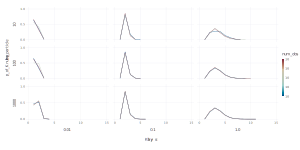

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] DataArrays.PooledDataArray{Float64,UInt32,1}(::DataArrays.RefArray{UInt32,1}, ::Array{Float64,1}) at /home/dave/.julia/v0.6/DataArrays/src/pooleddataarray.jl:72
 [3] DataArrays.PooledDataArray(::Array{Float64,1}, ::Array{Float64,1}, ::BitArray{1}, ::Type{UInt32}) at /home/dave/.julia/v0.6/DataArrays/src/pooleddataarray.jl:136
 [4] discretize(::Array{Float64,1}, ::Void, ::Void, ::Bool) at /home/dave/.julia/v0.6/Gadfly/src/scale.jl:301
 [5] discretize(::Array{Float64,1}, ::Void, ::Void) at /home/dave/.julia/v0.6/Gadfly/src/scale.jl:295
 [6] apply_scale(::Gadfly.Scale.DiscreteScale, ::Array{Gadfly.Aesthetics,1}, ::Gadfly.Data, ::Vararg{Gadfly.Data,N} where N) at /home/dave/.julia/v0.6/Gadfly/src/scale.jl:366
 [7] apply_scales(::IterTools.Distinct{Base.ValueIterator{Dict{Symbol,Gadfly.ScaleElement}},Gadfly.ScaleElement}, ::Array{Gadfly.Aesthetics,1}, ::Gadfly.Data, ::Vararg{Gadfly.Data,N} where N) at /home/dave/.julia/

In [79]:
@_ gibbs_p_of_K |> 
    @where(_, :α .< 10) |> 
    plot(_, x=:K, y=:p_of_K, ygroup=:num_particle, xgroup=:α, color=:num_obs,
         Geom.subplot_grid(Geom.line), Scale.color_log10) |>
    draw(SVG(30cm, 15cm), _)

## Comparing particle and gibbs

Just pick one number of observations and samples since it doesn't vary much.

In [80]:
gibbs_summary_one = @where(gibbs_summary, :num_obs .== 1000, :num_particle .== 1000)

4×9 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ num_particle │ num_obs │ α    │ low │ success │ high │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼─────┼─────────┼──────┼───────────┤
│ 1   │ 1000         │ 1000    │ 0.01 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 2   │ 1000         │ 1000    │ 0.1  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 3   │ 1000         │ 1000    │ 1.0  │ 1.0 │ 0.0     │ 0.0  │ 1.0       │
│ 4   │ 1000         │ 1000    │ 10.0 │ 1.0 │ 0.0     │ 0.0  │ 1.0       │

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] DataArrays.PooledDataArray{String,UInt32,1}(::DataArrays.RefArray{UInt32,1}, ::Array{String,1}) at /home/dave/.julia/v0.6/DataArrays/src/pooleddataarray.jl:72
 [3] DataArrays.PooledDataArray(::Array{String,1}, ::Array{String,1}, ::BitArray{1}, ::Type{UInt32}) at /home/dave/.julia/v0.6/DataArrays/src/pooleddataarray.jl:136
 [4] discretize(::Array{String,1}, ::Void, ::Void, ::Bool) at /home/dave/.julia/v0.6/Gadfly/src/scale.jl:301
 [5] discretize(::Array{String,1}, ::Void, ::Void) at /home/dave/.julia/v0.6/Gadfly/src/scale.jl:295
 [6] apply_scale(::Gadfly.Scale.DiscreteScale, ::Array{Gadfly.Aesthetics,1}, ::Gadfly.Data, ::Vararg{Gadfly.Data,N} where N) at /home/dave/.julia/v0.6/Gadfly/src/scale.jl:366
 [7] apply_scales(::IterTools.Distinct{Base.ValueIterator{Dict{Symbol,Gadfly.ScaleElement}},Gadfly.ScaleElement}, ::Array{Gadfly.Aesthetics,1}, ::Gadfly.Data, ::Vararg{Gadfly.Data,N} where N) at /home/dave/.julia/v0.6/G

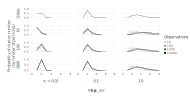

In [81]:
using Colors
ngray(start, finish) = n -> linspace(Gray(start), Gray(finish), n)

@_ @where(gibbs_p_of_K, :num_obs .== 1000, :num_particle .== 1000) |>
    @transform(_, num_particle_ = "Gibbs") |>
    vcat(_, @transform(run2_p_of_K, num_particle_ = string.(:num_particle))) |>
    @transform(_, α_str = ifelse.(:α .== 0.01, "α = 0.01", string.(:α))) |>
    @where(_, :num_particle_ .!= "1", :α .!= 10, :K .< 9) |>
    plot(_, x=:K, y=:p_of_K, ygroup=:num_particle_, xgroup=:α_str, color=:num_obs,
         Geom.subplot_grid(Geom.line, Guide.xticks(orientation=:horizontal)), 
         Scale.color_discrete(ngray(0.8, 0.0), levels=[10, 100, 1_000, 10_000]), 
         Guide.colorkey(title="Observations"), 
         Guide.ylabel("Probability of cluster number \n(by number of particles)", :vertical)) |>
    draw(SVG(7.5inch, 4inch), _)

In [82]:
plot(layer(run2_summary, x=:num_obs, y=:avg_p_K2, color=:num_particle, xgroup=:α,
           Geom.subplot_grid(Geom.line, Geom.point)), 
     layer(gibbs_summary_one, yintercept=:avg_p_K2, xgroup=:α, Theme(default_color=Gray(0.5)), Geom.subplot_grid(Geom.hline)),
     Scale.x_log10, Scale.color_discrete)

ErrorException: [91mSubplot geometries can not be used in multiple layers. Instead
use layers within one subplot geometry.
[39m

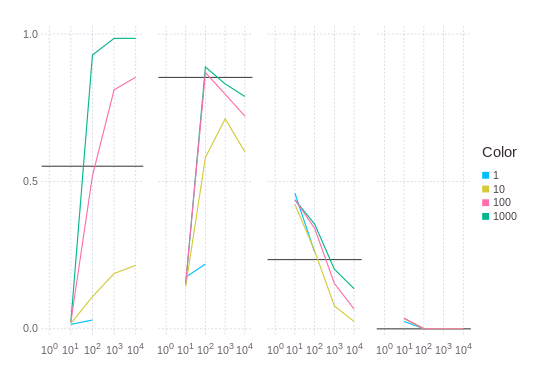

In [83]:
plot(Geom.subplot_grid(layer(run2_summary, x=:num_obs, y=:avg_p_K2, color=:num_particle, xgroup=:α, Geom.line),
                       layer(gibbs_summary_one, x=:num_obs, yintercept=:avg_p_K2, xgroup=:α, Geom.hline,
                             Theme(default_color=Gray(0.3)))),
    Scale.x_log10, Scale.color_discrete)

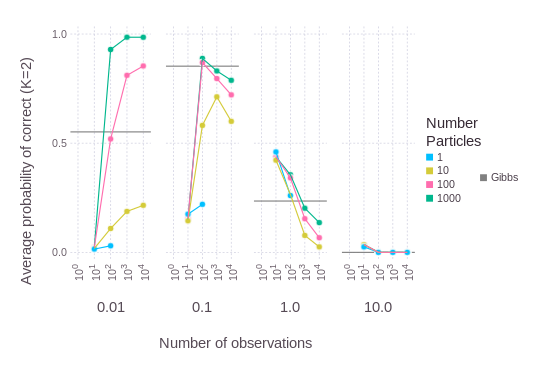

In [84]:
plot(run2_summary, xgroup=:α,
     Geom.subplot_grid(layer(
                             x=:num_obs, y=:avg_p_K2, color=:num_particle,
                             Geom.line, Geom.point),
                       layer(gibbs_summary_one,
                             yintercept=:avg_p_K2, xgroup=:α,
                             Geom.hline,
                             Theme(default_color=Gray(0.5)))),
     Scale.x_log10, Scale.color_discrete,
     Guide.ylabel("Average probability of correct (K=2)"),
     Guide.xlabel("Number of observations"),
     Guide.colorkey(title="Number\nParticles"),
     Guide.manual_color_key("", ["Gibbs"], [Gray(0.5)]))


# Run 3

This uses a 3-component mixture.

In [85]:
using FileIO
run3_exs, run3_res = load("results/run3-2018-02-01T17:45:54.006.jld2", "exs", "results")

run3_ers = flatten(run3_exs, run3_res, :num_obs)
run3_summary = results_summary(run3_ers)

64×9 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ num_particle │ num_obs │ α    │ low  │ success │ high │ avg_K_map │
├─────┼──────────────┼─────────┼──────┼──────┼─────────┼──────┼───────────┤
│ 1   │ 1            │ 10      │ 0.01 │ 0.9  │ 0.09    │ 0.01 │ 1.11      │
│ 2   │ 1            │ 100     │ 0.01 │ 0.89 │ 0.09    │ 0.02 │ 1.13      │
│ 3   │ 1            │ 1000    │ 0.01 │ 0.88 │ 0.1     │ 0.02 │ 1.14      │
│ 4   │ 1            │ 5000    │ 0.01 │ 0.87 │ 0.11    │ 0.02 │ 1.15      │
│ 5   │ 1            │ 10      │ 0.1  │ 0.49 │ 0.44    │ 0.07 │ 1.58      │
│ 6   │ 1            │ 100     │ 0.1  │ 0.43 │ 0.47    │ 0.1  │ 1.69      │
│ 7   │ 1            │ 1000    │ 0.1  │ 0.37 │ 0.48    │ 0.15 │ 1.82      │
│ 8   │ 1            │ 5000    │ 0.1  │ 0.37 │ 0.48    │ 0.15 │ 1.82      │
│ 9   │ 1            │ 10      │ 1.0  │ 0.07 │ 0.33    │ 0.6  │ 2.8       │
│ 10  │ 1            │ 100     │ 1.0  │ 0.01 │ 0.09    │ 0.9  │ 4.28      │
│ 11  │ 1            │ 1000    │ 1.0  │ 0.0  │ 0.02    │ 0.98 │ 5.57      │
⋮
│ 53  │ 1000         │ 10      │ 0.1  │ 0.28 │ 0.71    │ 0.01 │ 1.73      │
│ 54  │ 1000         │ 100     │ 0.1  │ 0.0  │ 0.51    │ 0.49 │ 2.5       │
│ 55  │ 1000         │ 1000    │ 0.1  │ 0.0  │ 0.0     │ 1.0  │ 3.08      │
│ 56  │ 1000         │ 5000    │ 0.1  │ 0.0  │ 0.0     │ 1.0  │ 3.15      │
│ 57  │ 1000         │ 10      │ 1.0  │ 0.04 │ 0.78    │ 0.18 │ 2.14      │
│ 58  │ 1000         │ 100     │ 1.0  │ 0.0  │ 0.25    │ 0.75 │ 2.8       │
│ 59  │ 1000         │ 1000    │ 1.0  │ 0.0  │ 0.0     │ 1.0  │ 3.69      │
│ 60  │ 1000         │ 5000    │ 1.0  │ 0.0  │ 0.0     │ 1.0  │ 4.6       │
│ 61  │ 1000         │ 10      │ 10.0 │ 0.0  │ 0.04    │ 0.96 │ 6.53      │
│ 62  │ 1000         │ 100     │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 9.61      │
│ 63  │ 1000         │ 1000    │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 18.37     │
│ 64  │ 1000         │ 5000    │ 10.0 │ 0.0  │ 0.0     │ 1.0  │ 26.22     │

In [105]:
run3_p_of_K = @_ run3_ers |>
    [Dict(er...) for er in _] |>
    dictofarrays |>
    DataFrame |>
    @where(_, :α .< 10) |>
    by(_, [:num_particle, :num_obs, :α]) do d
        pks = d[:p_of_K]
        max_k = maximum(length.(pks))
        ps = zeros(Float64, max_k)
        for pk in pks
            ps[1:length(pk)] .+= pk
        end
        DataFrame(K=1:max_k, p_of_K = ps ./ size(d,1))
    end

vlines = @_ run3_p_of_K |>
    @where(_, :K .< 9) |>
    by(_, [:num_particle, :α], (d) -> DataFrame(K=3))

12×3 DataFrames.DataFrame
│ Row │ num_particle │ α    │ K │
├─────┼──────────────┼──────┼───┤
│ 1   │ 1            │ 0.01 │ 3 │
│ 2   │ 1            │ 0.1  │ 3 │
│ 3   │ 1            │ 1.0  │ 3 │
│ 4   │ 10           │ 0.01 │ 3 │
│ 5   │ 10           │ 0.1  │ 3 │
│ 6   │ 10           │ 1.0  │ 3 │
│ 7   │ 100          │ 0.01 │ 3 │
│ 8   │ 100          │ 0.1  │ 3 │
│ 9   │ 100          │ 1.0  │ 3 │
│ 10  │ 1000         │ 0.01 │ 3 │
│ 11  │ 1000         │ 0.1  │ 3 │
│ 12  │ 1000         │ 1.0  │ 3 │

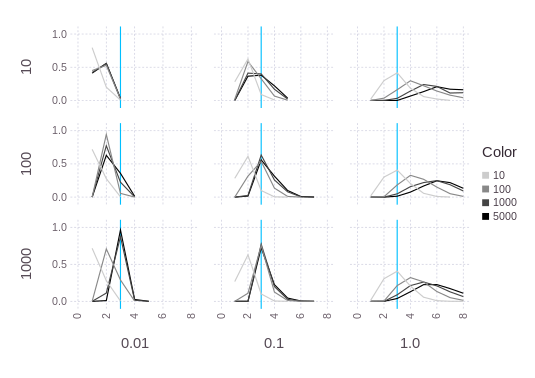

In [116]:
@_ run3_p_of_K |>
    @where(_, :num_particle .> 1, :K .< 9) |>
    plot(_, xgroup=:α, ygroup=:num_particle,
         Geom.subplot_grid(layer(_, x=:K, y=:p_of_K, ygroup=:num_particle, xgroup=:α, color=:num_obs,
                                 Geom.line),
                           layer(by(_, [:num_particle, :α], (d)->DataFrame(K=3)), 
                                 xintercept = :K, xgroup=:α, ygroup=:num_particle, Geom.vline)),
         Scale.color_discrete(ngray(0.8, 0.0), levels=[10, 100, 1000, 5000]))

# Entropy as a measure of success

The number of categories per se is not a good measure of success because many of the categories have a very small number of data points assigned to them (and will lose out in the future).  So we need a better way of measuring how good the solution is.  Let's use the _expected entropy_ of the state distribution.

In [6]:
experiment_example = exs[103]
experiment_example.params

Dict{Symbol,Any} with 8 entries:
  :α            => 1.0
  :num_particle => 100
  :ν_0          => 2.0
  :κ_0          => 0.05
  :μ_0          => 31.4579
  :σ2_0         => 694.493
  :num_obs      => [10, 100, 1000]
  :data         => [15.0563, 65.8428, 13.5915, 35.8906, 18.4502, 10.1452, 1.597…

In [7]:
# example =  run(experiment_example, ps -> copy(ps.particles), progress=true)
example =  run(experiment_example, deepcopy, progress=true)

Fitting particles...100%|███████████████████████████████| Time: 0:00:02


Particle filter with 100 particles:


3-element Array{Particles.ChenLiuParticles{Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}},1}:
 Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}[2+ Particle, 1+ Particle, 3+ Particle, 2+ Particle, 3+ Particle, 2+ Particle, 1+ Particle, 2+ Particle, 2+ Particle, 4+ Particle  …  3+ Particle, 2+ Particle, 3+ Particle, 1+ Particle, 3+ Particle, 4+ Particle, 3+ Particle, 1+ Particle, 2+ Particle, 3+ Particle]
 Particles.InfiniteParticle{ConjugatePriors.NormalInverseChisq{Float64},Distributions.NormalStats,Particles.ChineseRestaurantProcess}[2+ Particle, 2+ Particle, 3+ Particle, 3+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 2+ Particle, 3+ Particle, 3+ Particle  …  3+ Particle, 3+ Particle, 3+ Particle, 2+ Particle, 3+ Particle, 3+ Particle, 3+ Particle, 2+ Particle, 2+ Particle, 3+ Particle]
 Particles.InfinitePartic

Particle filter with 100 particles:
Particle filter with 100 particles:
Particle filter with 100 particles:
Particle filter with 100 particles:
Particle filter with 100 particles:
Particle filter with 100 particles:
Particle filter with 100 particles:
Particle filter with 100 particles:


In [8]:
example_dists = posterior_predictive.(example[end].particles)

100-element Array{Distributions.MixtureModel{Distributions.Univariate,Distributions.Continuous,Distributions.LocationScale{Float64,Distributions.TDist{Float64}}},1}:
 MixtureModel{Distributions.LocationScale{Float64,Distributions.TDist{Float64}}}(K = 4)
components[1] (prior = 0.4975): Distributions.LocationScale{Float64,Distributions.TDist{Float64}}(
μ: 11.091
σ: 7.24114
ρ: Distributions.TDist{Float64}(ν=500.0)
)

components[2] (prior = 0.4885): Distributions.LocationScale{Float64,Distributions.TDist{Float64}}(
μ: 52.8087
σ: 20.068
ρ: Distributions.TDist{Float64}(ν=491.0)
)

components[3] (prior = 0.0130): Distributions.LocationScale{Float64,Distributions.TDist{Float64}}(
μ: 65.4179
σ: 21.8799
ρ: Distributions.TDist{Float64}(ν=15.0)
)

components[4] (prior = 0.0010): Distributions.LocationScale{Float64,Distributions.TDist{Float64}}(
μ: 31.4579
σ: 120.766
ρ: Distributions.TDist{Float64}(ν=2.0)
)

                                                                                           

In [9]:
state_entropy.(example)

3-element Array{Float64,1}:
 0.651395
 0.782216
 0.71462 

In [10]:
Experiments.result_entropy

result_entropy (generic function with 1 method)

In [11]:
run(experiment_example, Experiments.result_entropy, progress=true)

Fitting particles...100%|███████████████████████████████| Time: 0:00:02


3-element Array{Tuple{Experiments.Result,Float64},1}:
 (Experiments.Result(2, 1.8876, 1, [0.367701, 0.414117, 0.187535, 0.0241758, 0.00647157]), 0.651395)     
 (Experiments.Result(2, 2.41613, 2, [0.0, 0.600686, 0.3825, 0.0168141]), 0.782216)                       
 (Experiments.Result(3, 2.77817, 2, [0.0, 0.370818, 0.516214, 0.0850795, 0.0197542, 0.0081336]), 0.71462)